In [2]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) 

In [3]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values


In [4]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [5]:
# Find the cov matrix
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

In [6]:
# Eigenvalues and eigenvectors
u,s,v = np.linalg.svd(cov_mat)
eigval=s

In [7]:
# reduce the dimension to 2 and find the projection matrix w
eig_pairs = [(np.abs(eigval[i]), u[:,i]) for i in range(len(eigval))]
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

In [8]:
# Calculate the projection
Y = X_std.dot(matrix_w)

No handles with labels found to put in legend.


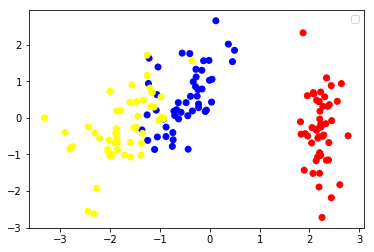

In [9]:
# Plot the projected data
import matplotlib.pyplot as plt
import pandas as pd
dfcolor = pd.DataFrame([['Iris-setosa','red'],['Iris-versicolor','blue'],['Iris-virginica','yellow']],columns=['class','Color'])
mergeddf = pd.merge(df,dfcolor,on='class')
# print(mergeddf)
plt.scatter(Y[:, 0], Y[:, 1], c=mergeddf['Color'])
plt.show()

(150, 3)
(1, 3)
[[ 9.14396497 -2.07780897 21.47933908]]
1-PCA 1 dimesional PCA
[[-0.10629389]
 [-0.1077319 ]
 [-0.11572818]
 [-0.10919385]
 [-0.10833684]
 [-0.0910818 ]
 [-0.11423904]
 [-0.10366993]
 [-0.11567705]
 [-0.1041998 ]
 [-0.09814601]
 [-0.10308892]
 [-0.10939659]
 [-0.12945112]
 [-0.1043532 ]
 [-0.09579985]
 [-0.10672329]
 [-0.10629389]
 [-0.08570948]
 [-0.10351833]
 [-0.08919045]
 [-0.10314006]
 [-0.13063707]
 [-0.09380623]
 [-0.09135781]
 [-0.09824647]
 [-0.09975956]
 [-0.10071883]
 [-0.10425093]
 [-0.10399707]
 [-0.10195411]
 [-0.09701119]
 [-0.10298846]
 [-0.10228305]
 [-0.1041998 ]
 [-0.1146445 ]
 [-0.10354553]
 [-0.1041998 ]
 [-0.11996569]
 [-0.10200524]
 [-0.11186894]
 [-0.11565311]
 [-0.12072223]
 [-0.10013783]
 [-0.08787684]
 [-0.10939659]
 [-0.09960796]
 [-0.11348249]
 [-0.09981069]
 [-0.10720203]
 [ 0.05551221]
 [ 0.03770336]
 [ 0.06204654]
 [ 0.00657378]
 [ 0.0447915 ]
 [ 0.02756366]
 [ 0.04348115]
 [-0.0311652 ]
 [ 0.04607791]
 [-0.00384373]
 [-0.02016669]
 [ 0.0

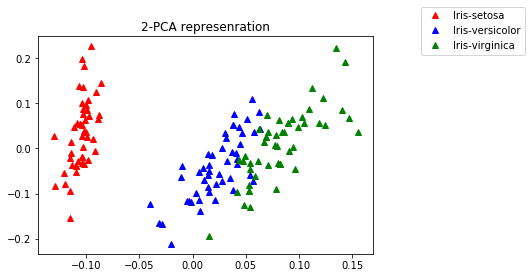

In [14]:
#pca on Iris dataset
import pandas as pd
data = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None,sep=',')
#loading the dataset
X = data.iloc[:,0:3].values
y = data.iloc[:,4].values

import numpy as np

M = np.mean(X, axis=0)
X=X-M
X_trans = np.matrix.transpose(X)

#finding the covariance matrix

cov_mat = (X.dot(X_trans))/150

#finding the eigen value
  
u,s,v = np.linalg.svd(cov_mat)
u_reduce = u[:,0:1]
print (np.shape(X))
#get the reduced matrix values
z=np.matrix.transpose(u_reduce).dot(X)
print (np.shape(z))
print (z)
print ('1-PCA 1 dimesional PCA')
print (u_reduce)
print ('2-PCA 2 dimensional PCA')
u_reduce = u[:,0:2]
print (u_reduce)

y_new = [] 
a=0
b=0
c=0
for i in range(0,len(y)):
	if y[i]=='Iris-setosa':
		y_new = y_new+ ['r']
		a=i
	elif y[i] == 'Iris-versicolor':
		y_new = y_new + ['g']
		b=i
	elif y[i] == 'Iris-virginica':
		y_new = y_new + ['b']
		c=i
print (a)
print (b)
print (c)
print (np.shape(y))
print (len(y_new))
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1

pd.DataFrame(u_reduce).to_csv("pca_iris1.csv")# plt.hold(True)
print (np.shape(u_reduce[0:49,0]))
plt.figure(1)
plt.title('2-PCA represenration')
plt.plot(u_reduce[0:49,0],u_reduce[0:49,1],'r^',label='Iris-setosa')
plt.plot(u_reduce[50:99,0],u_reduce[50:99,1],'b^',label = 'Iris-versicolor')
plt.plot(u_reduce[100:150,0],u_reduce[100:150,1],'g^',label = 'Iris-virginica')
plt.legend(bbox_to_anchor=(1, 1),bbox_transform=plt.gcf().transFigure)


plt.show()